#**IMPORTING LIBRARIES AND DATAFRAME**

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [101]:
df = pd.read_csv("LAB 1 - Online Retail Data.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
0,C556445,M,Manual,-1,6/10/2011,38970.00,15098.0,uk,1,0.00,5.0,Domestic
1,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011,16453.71,NaN,UK,1,0.00,5.0,Domestic
2,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010,13541.33,NaN,United Kingdom,0,13541.33,5.0,Domestic
3,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010,13541.33,NaN,United Kingdom,1,0.00,5.0,Domestic
4,C537644,AMAZONFEE,AMAZON FEE,-1,12/7/2010,13474.79,NaN,United Kingdom,1,0.00,5.0,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
286355,566605,23209,LUNCH BAG VINTAGE DOILY,4,9/13/2011,NaN,13263.0,United Kingdom,0,6.60,2.0,Domestic
286356,538163,22659,LUNCH BOX I LOVE LONDON,2,12/9/2010,NaN,17841.0,United Kingdom,0,3.90,2.0,Domestic
286357,537141,20713,JUMBO BAG OWLS,3,12/5/2010,NaN,15570.0,United Kingdom,0,5.85,2.0,Domestic
286358,545895,22228,BUNNY WOODEN PAINTED WITH BIRD,2,3/7/2011,NaN,NaN,United Kingdom,0,3.26,2.0,Domestic


#**DATA INITIAL EXPLORATION AND CLEANING**

In [102]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
0,C556445,M,Manual,-1,6/10/2011,38970.00,15098.0,uk,1,0.00,5.0,Domestic
1,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011,16453.71,NaN,UK,1,0.00,5.0,Domestic
2,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010,13541.33,NaN,United Kingdom,0,13541.33,5.0,Domestic
3,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010,13541.33,NaN,United Kingdom,1,0.00,5.0,Domestic
4,C537644,AMAZONFEE,AMAZON FEE,-1,12/7/2010,13474.79,NaN,United Kingdom,1,0.00,5.0,Domestic


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286360 entries, 0 to 286359
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    286360 non-null  object 
 1   StockCode    286360 non-null  object 
 2   Description  285568 non-null  object 
 3   Quantity     286360 non-null  int64  
 4   InvoiceDate  286360 non-null  object 
 5   UnitPrice    276170 non-null  float64
 6   CustomerID   211516 non-null  float64
 7   Country      286360 non-null  object 
 8   Canceled     286360 non-null  int64  
 9   Revenue      286360 non-null  float64
 10  Category     284976 non-null  float64
 11  Destination  286360 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 26.2+ MB


In [104]:
df.isna().sum().sort_values(ascending = False)

,0
CustomerID,74844
UnitPrice,10190
Category,1384
Description,792
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
Country,0
Canceled,0


In [105]:
df.duplicated().sum()

9080

In [106]:
df = df.drop_duplicates()

In [107]:
df.duplicated().sum()

0

In [108]:
noc_df = df[df['InvoiceNo'].str.contains(r'^[a-bd-zA-BD-Z]', regex=True, na=False)]

noc_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
282355,A563187,B,Adjust bad debt,1,8/12/2011,-110620600.0,NaN,United Kingdom,0,-11062.06,NaN,Domestic


In [109]:
#df = df.drop(df[df['InvoiceNo'].str.contains(r'^[a-bd-zA-BD-Z]', regex=True, na=False)].index[0])

In [110]:
df[(df['Quantity']<0) & ~(df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
280973,537027,18098C,NaN,-140,12/3/2010,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280974,542546,20734,NaN,-1,1/28/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280975,565072,21820,NaN,-210,8/31/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280980,581190,84801A,check,-102,12/7/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280981,536998,85067,NaN,-6,12/3/2010,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
282344,549463,84919,NaN,-17,4/8/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282347,569831,20713,wrongly coded-23343,-800,10/6/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282350,570259,22336,NaN,-114,10/10/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282353,571723,85211,NaN,-1,10/18/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic


In [111]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
0,C556445,M,Manual,-1,6/10/2011,38970.00,15098.0,uk,1,0.00,5.0,Domestic
1,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011,16453.71,NaN,UK,1,0.00,5.0,Domestic
2,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010,13541.33,NaN,United Kingdom,0,13541.33,5.0,Domestic
3,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010,13541.33,NaN,United Kingdom,1,0.00,5.0,Domestic
4,C537644,AMAZONFEE,AMAZON FEE,-1,12/7/2010,13474.79,NaN,United Kingdom,1,0.00,5.0,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
286355,566605,23209,LUNCH BAG VINTAGE DOILY,4,9/13/2011,NaN,13263.0,United Kingdom,0,6.60,2.0,Domestic
286356,538163,22659,LUNCH BOX I LOVE LONDON,2,12/9/2010,NaN,17841.0,United Kingdom,0,3.90,2.0,Domestic
286357,537141,20713,JUMBO BAG OWLS,3,12/5/2010,NaN,15570.0,United Kingdom,0,5.85,2.0,Domestic
286358,545895,22228,BUNNY WOODEN PAINTED WITH BIRD,2,3/7/2011,NaN,NaN,United Kingdom,0,3.26,2.0,Domestic


#Droping out of range dates

**WARNING**
After droping out of range dates, The results became hilarious: USA which had 41% cancelation rate has become 0% and Chzeck became the top. To check the hilarious results, just uncomment the next two cells.

In [112]:
"""
#Out of Range Data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y')
start_date = pd.to_datetime('01/12/2010', format='%m/%d/%Y')
end_date = pd.to_datetime('09/12/2011', format='%m/%d/%Y')
df_out = df[(df['InvoiceDate']<start_date) | (df['InvoiceDate']>end_date)]
df_out"""

"\n#Out of Range Data\ndf['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y')\nstart_date = pd.to_datetime('01/12/2010', format='%m/%d/%Y')\nend_date = pd.to_datetime('09/12/2011', format='%m/%d/%Y')\ndf_out = df[(df['InvoiceDate']<start_date) | (df['InvoiceDate']>end_date)]\ndf_out"

In [113]:
"""
df = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]
df
"""

"\ndf = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]\ndf\n"

#**PRODUCTS ONLY DATAFRAME**

In [114]:
# Filtering for products that contain exactly 5 digits in any order (among other characters)
df = df[df['StockCode'].str.contains(r'\d.*\d.*\d.*\d.*\d', regex=True)]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
195,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010,295.0,16607.0,United Kingdom,0,295.0,5.0,Domestic
196,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011,295.0,13452.0,United Kingdom,0,295.0,5.0,Domestic
197,543253,22655,VINTAGE RED KITCHEN CABINET,1,2/4/2011,295.0,14842.0,United Kingdom,0,295.0,5.0,Domestic
198,554836,22655,VINTAGE RED KITCHEN CABINET,1,5/26/2011,295.0,13015.0,United Kingdom,0,295.0,5.0,Domestic
199,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010,295.0,13145.0,United Kingdom,0,295.0,5.0,Domestic


In [115]:
# Remove non-digit characters and keep only the digits
df['StockCode'] = df['StockCode'].str.replace(r'\D', '', regex=True)

# Now filter rows where the 'StockCode' contains exactly 5 digits
df = df[df['StockCode'].str.match(r'^\d{5}$')]

# Display the filtered DataFrame
df.head()


<ipython-input-115-a36020dbf312>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockCode'] = df['StockCode'].str.replace(r'\D', '', regex=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
195,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010,295.0,16607.0,United Kingdom,0,295.0,5.0,Domestic
196,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011,295.0,13452.0,United Kingdom,0,295.0,5.0,Domestic
197,543253,22655,VINTAGE RED KITCHEN CABINET,1,2/4/2011,295.0,14842.0,United Kingdom,0,295.0,5.0,Domestic
198,554836,22655,VINTAGE RED KITCHEN CABINET,1,5/26/2011,295.0,13015.0,United Kingdom,0,295.0,5.0,Domestic
199,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010,295.0,13145.0,United Kingdom,0,295.0,5.0,Domestic


In [116]:
df.isna().sum().sort_values(ascending = False)

,0
CustomerID,70805
UnitPrice,10067
Category,1306
Description,754
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
Country,0
Canceled,0


In [117]:
#Checking for negative revenue (will be needed later)
df[df['Revenue']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


In [118]:
df[(df['Quantity']>0) & ~(df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
195,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010,295.0,16607.0,United Kingdom,0,295.00,5.0,Domestic
196,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011,295.0,13452.0,United Kingdom,0,295.00,5.0,Domestic
197,543253,22655,VINTAGE RED KITCHEN CABINET,1,2/4/2011,295.0,14842.0,United Kingdom,0,295.00,5.0,Domestic
198,554836,22655,VINTAGE RED KITCHEN CABINET,1,5/26/2011,295.0,13015.0,United Kingdom,0,295.00,5.0,Domestic
199,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010,295.0,13145.0,United Kingdom,0,295.00,5.0,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
286355,566605,23209,LUNCH BAG VINTAGE DOILY,4,9/13/2011,NaN,13263.0,United Kingdom,0,6.60,2.0,Domestic
286356,538163,22659,LUNCH BOX I LOVE LONDON,2,12/9/2010,NaN,17841.0,United Kingdom,0,3.90,2.0,Domestic
286357,537141,20713,JUMBO BAG OWLS,3,12/5/2010,NaN,15570.0,United Kingdom,0,5.85,2.0,Domestic
286358,545895,22228,BUNNY WOODEN PAINTED WITH BIRD,2,3/7/2011,NaN,NaN,United Kingdom,0,3.26,2.0,Domestic


#**COLUMNS FIXING**

#StockCode Column

In [119]:
# Remove non-digit characters and keep only the digits
df['StockCode'] = df['StockCode'].str.replace(r'\D', '', regex=True)

# Now filter rows where the 'StockCode' contains exactly 5 digits
df = df[df['StockCode'].str.match(r'^\d{5}$')]

# Display the filtered DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
195,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010,295.0,16607.0,United Kingdom,0,295.0,5.0,Domestic
196,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011,295.0,13452.0,United Kingdom,0,295.0,5.0,Domestic
197,543253,22655,VINTAGE RED KITCHEN CABINET,1,2/4/2011,295.0,14842.0,United Kingdom,0,295.0,5.0,Domestic
198,554836,22655,VINTAGE RED KITCHEN CABINET,1,5/26/2011,295.0,13015.0,United Kingdom,0,295.0,5.0,Domestic
199,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010,295.0,13145.0,United Kingdom,0,295.0,5.0,Domestic


#Invoice Column

In [120]:
#Checking for length less than 6
df[(df['InvoiceNo'].str.len() < 6)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


In [121]:
#Checking for length that all 6 digits has only digits

df[(df['InvoiceNo'].str.len() == 6) & ~(df['InvoiceNo'].str.contains(r'\d', regex=True, na=False))]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


In [122]:
#Checking wether there are any InvoiceNo that has been closed (7 digits) and doesn't have 7 digits
df[(df['InvoiceNo'].str.len() != 7) & (df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


#Canceled Column

In [123]:
#Checking Canceled Categories
df['Canceled'].unique()

array([0, 1, 2])

In [124]:
#Checking if canceled = 0 have C in invoice which might be closed
df[(df['Canceled'] == 0) & (df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


In [125]:
#Checking if canceled = 1 have C in invoice which might be closed
df[(df['Canceled'] == 1) & (df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
220,C540652,22655,VINTAGE RED KITCHEN CABINET,-1,1/10/2011,265.5,17406.0,United Kingdom,1,0.0,5.0,Domestic
315,C553564,22826,LOVE SEAT ANTIQUE WHITE METAL,-1,5/17/2011,195.0,17581.0,United Kingdom,1,0.0,5.0,Domestic
358,C539224,22656,VINTAGE BLUE KITCHEN CABINET,-1,12/16/2010,175.0,17377.0,United Kingdom,1,0.0,5.0,Domestic
452,C562561,22656,VINTAGE BLUE KITCHEN CABINET,-1,8/5/2011,125.0,16729.0,United Kingdom,1,0.0,5.0,Domestic
457,C549549,22656,VINTAGE BLUE KITCHEN CABINET,-1,4/10/2011,125.0,16359.0,United Kingdom,1,0.0,5.0,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
286091,C576561,22386,JUMBO BAG PINK POLKADOT,-2,11/15/2011,NaN,15311.0,United Kingdom,1,0.0,2.0,Domestic
286093,C538802,22198,LARGE POPCORN HOLDER,-4,12/14/2010,NaN,17017.0,United Kingdom,1,0.0,2.0,Domestic
286097,C569655,22659,LUNCH BOX I LOVE LONDON,-2,10/5/2011,NaN,14534.0,United Kingdom,1,0.0,2.0,Domestic
286108,C566469,22488,NATURAL SLATE RECTANGLE CHALKBOARD,-1,9/12/2011,NaN,13709.0,United Kingdom,1,0.0,2.0,Domestic


In [126]:
#Checking if canceled = 2 have C in invoice which might be closed
df[(df['Canceled'] == 2) & (df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


In [127]:
df[df['Canceled'] == 2]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
450,539440,22655,VINTAGE RED KITCHEN CABINET,2,12/17/2010,125.00,16607.0,United Kingdom,2,250.00,5.0,Domestic
1471,581439,85066,CREAM SWEETHEART MINI CHEST,1,12/8/2011,24.96,NaN,United Kingdom,2,24.96,5.0,Domestic
1472,580367,21258,VICTORIAN SEWING BOX LARGE,1,12/2/2011,24.96,NaN,United Kingdom,2,24.96,5.0,Domestic
2024,560298,22501,PICNIC BASKET WICKER LARGE,1,7/18/2011,20.79,NaN,United Kingdom,2,20.79,5.0,Domestic
2025,570258,22501,PICNIC BASKET WICKER LARGE,1,10/10/2011,20.79,NaN,United Kingdom,2,20.79,5.0,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
132363,577768,23263,SET OF 3 WOODEN HEART DECORATIONS,2,11/21/2011,2.46,NaN,United Kingdom,2,4.92,3.0,Domestic
142303,561700,85152,HAND OVER THE CHOCOLATE SIGN,12,7/29/2011,2.10,14738.0,United Kingdom,2,25.20,3.0,Domestic
142304,548707,85152,HAND OVER THE CHOCOLATE SIGN,2,4/3/2011,2.10,13781.0,United Kingdom,2,4.20,3.0,Domestic
151143,578074,23215,JINGLE BELL HEART ANTIQUE SILVER,4,11/22/2011,2.08,17590.0,United Kingdom,2,8.32,3.0,Domestic


In [128]:
#Changing 2 to 0

cond = (df['Canceled'] == 2) & ~(df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False))
df.loc[cond,'Canceled'] = 0

In [129]:

df[df['Canceled'] == 2]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


#Quantity Column

In [130]:
#Checking if not cancelled and quantity > 0 which is right

df[(df['Canceled']==0) & (df['Quantity']>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
195,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010,295.0,16607.0,United Kingdom,0,295.00,5.0,Domestic
196,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011,295.0,13452.0,United Kingdom,0,295.00,5.0,Domestic
197,543253,22655,VINTAGE RED KITCHEN CABINET,1,2/4/2011,295.0,14842.0,United Kingdom,0,295.00,5.0,Domestic
198,554836,22655,VINTAGE RED KITCHEN CABINET,1,5/26/2011,295.0,13015.0,United Kingdom,0,295.00,5.0,Domestic
199,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010,295.0,13145.0,United Kingdom,0,295.00,5.0,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
286355,566605,23209,LUNCH BAG VINTAGE DOILY,4,9/13/2011,NaN,13263.0,United Kingdom,0,6.60,2.0,Domestic
286356,538163,22659,LUNCH BOX I LOVE LONDON,2,12/9/2010,NaN,17841.0,United Kingdom,0,3.90,2.0,Domestic
286357,537141,20713,JUMBO BAG OWLS,3,12/5/2010,NaN,15570.0,United Kingdom,0,5.85,2.0,Domestic
286358,545895,22228,BUNNY WOODEN PAINTED WITH BIRD,2,3/7/2011,NaN,NaN,United Kingdom,0,3.26,2.0,Domestic


In [131]:
#Checking if not cancelled and quantity < 0 which is wrong and needs quantity correction

df[(df['Canceled']==0) & (df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
280973,537027,18098,NaN,-140,12/3/2010,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280974,542546,20734,NaN,-1,1/28/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280975,565072,21820,NaN,-210,8/31/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280980,581190,84801,check,-102,12/7/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280981,536998,85067,NaN,-6,12/3/2010,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
282344,549463,84919,NaN,-17,4/8/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282347,569831,20713,wrongly coded-23343,-800,10/6/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282350,570259,22336,NaN,-114,10/10/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282353,571723,85211,NaN,-1,10/18/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic


In [132]:
#Changing the quantity to positive
cond_pos = (df['Canceled']==0) & (df['Quantity']<0)
df.loc[cond_pos, 'Quantity'] = df.loc[cond_pos, 'Quantity'] * -1


In [133]:
#Checking that there is no Closed InvoiceNo with positive quantity
df[(df['Quantity']>=0) & (df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False))].shape[0]

0

In [134]:
df.loc[cond_pos]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
280973,537027,18098,NaN,140,12/3/2010,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280974,542546,20734,NaN,1,1/28/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280975,565072,21820,NaN,210,8/31/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280980,581190,84801,check,102,12/7/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280981,536998,85067,NaN,6,12/3/2010,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
282344,549463,84919,NaN,17,4/8/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282347,569831,20713,wrongly coded-23343,800,10/6/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282350,570259,22336,NaN,114,10/10/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282353,571723,85211,NaN,1,10/18/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic


In [135]:
#Checking if not Canceled according to the InvoicNo but Quantity is negative
df[~(df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False)) & (df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


In [136]:
#Checking if Canceled according to the InvoicNo but Quantity is positive
df[(df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False)) & (df['Quantity']>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


#Country Column

In [137]:
#Checking for missing values
df.isna().sum().sort_values(ascending=False).loc[['Country']].values[0]

0

In [138]:
df.value_counts("Country")

,count
Country,
United Kingdom,240064
UK,11843
Germany,4662
France,4186
EIRE,4123
Spain,1240
Netherlands,1167
Switzerland,994
Belgium,977


In [139]:
df.loc[df['Country'].isin(['UK', 'uk']), 'Country'] = 'United Kingdom'
df.loc[df['Country'].isin(['Hong Kong']), 'Country'] = 'China'
df.value_counts("Country")

,count
Country,
United Kingdom,252842
Germany,4662
France,4186
EIRE,4123
Spain,1240
Netherlands,1167
Switzerland,994
Belgium,977
Portugal,763


In [140]:
#Checking for duplicates after fixing country column
df.duplicated().sum()

947

In [141]:
#Removing these duplicats
df = df.drop_duplicates()

#Destination Column

In [142]:
#Checking for missing values
df.isna().sum().sort_values(ascending=False).loc[['Destination']].values[0]

0

In [143]:
df['Destination'].value_counts()

,count
Destination,
Domestic,251895
International,22938


In [144]:
#Checking if there are any United Kingdom values that might be wrongly International.
df[(df['Country'] == 'United Kingdom') & (df['Destination'] == 'International')].shape[0]

0

No need to be fixed

#UnitPrice Column

In [145]:
#Checking for missing values
df.isna().sum().sort_values(ascending=False).loc[['UnitPrice']].values[0]

10062

In [146]:
#Checking for the Unite Price = 0
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
280972,567131,21830,damaged,192,9/16/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280973,537027,18098,NaN,140,12/3/2010,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280974,542546,20734,NaN,1,1/28/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280975,565072,21820,NaN,210,8/31/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
280976,537534,22686,FRENCH BLUE METAL DOOR SIGN No,2,12/7/2010,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
282349,577968,85135,NaN,2,11/22/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282350,570259,22336,NaN,114,10/10/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282352,569517,23084,NaN,14,10/4/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic
282353,571723,85211,NaN,1,10/18/2011,0.0,NaN,United Kingdom,0,0.0,NaN,Domestic


Unit price for sure affects the revenue so the revenue column needs to be recalculated.

In [147]:
#Transforming Unit price = 0 to Nan to replace it with its real price according to the StockCode
df.loc[df['UnitPrice'] == 0, 'UnitPrice'] = np.NaN

#Imputing Unit Price Column for the same StockCode:
df['UnitPrice'] = (
    df.sort_values('InvoiceDate')  # Sort by date to ensure chronological order
    .groupby('StockCode')['UnitPrice']
    .transform(lambda x: x.ffill().bfill())  # Apply forward-fill and backward-fill
)


In [148]:
#Checking for missing values
df.isna().sum().sort_values(ascending=False).loc[['UnitPrice']].values[0]

73

There are still 51 missing unit price that has no unit price for the stock id.

#Description Column

In [149]:
#Checking for missing values
df.isna().sum().sort_values(ascending=False).loc[['Description']].values[0]

751

In [150]:
df[(df['Revenue']==0) & ~(df['Canceled']==1) & ~(df['Description']=='damaged')]['Description'].unique()

array([nan, 'FRENCH BLUE METAL DOOR SIGN No',
       'FRENCH BLUE METAL DOOR SIGN 5', 'check', 'damages',
       'ENAMEL FLOWER JUG CREAM', 'ASSTD DESIGN 3D PAPER STICKERS',
       'wrongly marked. 23343 in box', 'PARTY BUNTING',
       'BLUE POLKADOT LUGGAGE TAG', 'found', 'DOORMAT 3 SMILEY CATS',
       'AIRLINE BAG VINTAGE TOKYO 78', 'REGENCY CAKESTAND 3 TIER',
       'crushed', 'PIGGY BANK RETROSPOT', 'printing smudges/thrown away',
       'wet pallet', 'thrown away', 'wrongly sold sets',
       'allocate stock for dotcom orders ta', 'wet damaged',
       'CHILDRENS APRON SPACEBOY DESIGN', 'wrong barcode', '?',
       'Wet pallet-thrown away', 'JUMBO BAG RED RETROSPOT',
       'CHILDS GARDEN RAKE BLUE', 'VICTORIAN SEWING BOX LARGE',
       'DOORMAT HOME SWEET HOME BLUE', 'MIA', 'throw away', 'Found',
       'wet/rusty', 'BINGO SET', 'Damaged', 'damages?',
       'MILK PAN PINK POLKADOT', 'IVORY KITCHEN SCALES',
       'CIRCUS PARADE LUNCH BOX', 'dotcom adjust', 'Adjustment',
      

In [151]:
description_mapping = {
    'damaged': 'Damaged',
    'Damaged': 'Damaged',
    'damages': 'Damaged',
    'damages?': 'Damaged',
    'Printing smudges/thrown away': 'Damaged',
    'printing smudges/thrown away': 'Damaged',
    'crushed': 'Damaged',
    'crushed boxes': 'Damaged',
    'mouldy': 'Damaged',
    'mouldy, unsaleable.': 'Damaged',
    'rusty thrown away': 'Damaged',
    'rusty throw away': 'Damaged',
    'smashed': 'Damaged',
    '??': 'Unknown',
    '???': 'Unknown',
    '????damages????': 'Damaged',
    '?missing': 'Missing',
    '?lost': 'Missing',
    'missing': 'Missing',
    'lost': 'Missing',
    'found': 'Found',
    'Found': 'Found',
    'check': 'Check',
    'Check': 'Check',
    'adjustment': 'Adjustment',
    'Adjustment': 'Adjustment',
    'Amazon': 'Amazon Adjustment',
    'amazon': 'Amazon Adjustment',
    'dotcom': 'Dotcom Adjustment',
    'Dotcom': 'Dotcom Adjustment',
    'dotcom adjust': 'Dotcom Adjustment',
    'dotcomstock': 'Dotcom Adjustment',
    'dotcom orders ta': 'Dotcom Adjustment',
    'allocate stock for dotcom orders ta': 'Dotcom Adjustment',
    'Amazon Adjustment': 'Amazon Adjustment',
    'wrongly marked': 'Wrongly Marked',
    'wrongly sold sets': 'Wrongly Marked',
    'wrongly coded 20713': 'Wrongly Coded',
    'wrong barcode': 'Wrong Barcode',
    'wrong barcode (22467)': 'Wrong Barcode',
    'wrongly marked 23343': 'Wrongly Marked',
    'came coded as 20713': 'Wrongly Coded',
    'historic computer difference?....se': 'Adjustment',
    'marked as 23343': 'Wrongly Marked',
    'Sold as 1 on dotcom': 'Dotcom Adjustment',
    'Amazon sold sets': 'Amazon Adjustment',
    "sold as 22467": 'Wrongly Marked',
    'sold in set?': 'Sold as Set',
    'Sold as 1 on dotcom': 'Dotcom Adjustment',
    'sold as sets': 'Sold as Set',
    'mixed up': 'Error',
    'temp adjustment': 'Adjustment',
    're-adjustment': 'Adjustment',
    'on cargo order': 'Adjustment',
    'taig adjust': 'Adjustment',
    'stock credited wrongly': 'Adjustment',
    'had been put aside': 'Error',
    'mailout': 'Error',
    'test': 'Test',
}

# Replace values in the 'Description' column based on the mapping
df['Description'] = df['Description'].replace(description_mapping)

# Check unique values to confirm standardization
print(df['Description'].unique())


['VINTAGE RED KITCHEN CABINET' 'VINTAGE BLUE KITCHEN CABINET'
 'LOVE SEAT ANTIQUE WHITE METAL' ... "GIFT BAG LARGE 50'S CHRISTMAS"
 'MULTICOLOUR EASTER RABBIT' 'PURPLE/TURQ FLOWERS HANDBAG']


In [152]:
"""
# Exclude rows with specific 'Description' values
exclude_descriptions = [
    'Damaged', 'Wrongly Marked', 'Wrongly Coded', 'Wrong Barcode',
    'Crushed', 'Rusty', 'Mouldy', 'Adjustment', 'Amazon Adjustment',
    'Dotcom Adjustment', 'Missing', 'Unknown', 'Check', 'Test']


df = df[(df['Revenue'] == 0) & ~(df['Canceled'] == 1) & ~(df['Description'].isin(exclude_descriptions))]

df
"""

"\n# Exclude rows with specific 'Description' values\nexclude_descriptions = [\n    'Damaged', 'Wrongly Marked', 'Wrongly Coded', 'Wrong Barcode',\n    'Crushed', 'Rusty', 'Mouldy', 'Adjustment', 'Amazon Adjustment',\n    'Dotcom Adjustment', 'Missing', 'Unknown', 'Check', 'Test']\n\n\ndf = df[(df['Revenue'] == 0) & ~(df['Canceled'] == 1) & ~(df['Description'].isin(exclude_descriptions))]\n\ndf\n"

#Revenue Column

In [153]:
#Checking if there is Revenue even if the transaction is canceled.

print(df[(df['Revenue'] > 0) & (df['Canceled'] == 1)].shape[0])

0


In [154]:
#Checking if there is no Revenue even if the transaction is not canceled.

df[(df['Revenue'] <= 0) & (df['Canceled'] == 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
280972,567131,21830,Damaged,192,9/16/2011,0.42,NaN,United Kingdom,0,0.0,NaN,Domestic
280973,537027,18098,NaN,140,12/3/2010,5.91,NaN,United Kingdom,0,0.0,NaN,Domestic
280974,542546,20734,NaN,1,1/28/2011,1.63,NaN,United Kingdom,0,0.0,NaN,Domestic
280975,565072,21820,NaN,210,8/31/2011,3.75,NaN,United Kingdom,0,0.0,NaN,Domestic
280976,537534,22686,FRENCH BLUE METAL DOOR SIGN No,2,12/7/2010,2.46,NaN,United Kingdom,0,0.0,NaN,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
282349,577968,85135,NaN,2,11/22/2011,7.95,NaN,United Kingdom,0,0.0,NaN,Domestic
282350,570259,22336,NaN,114,10/10/2011,1.28,NaN,United Kingdom,0,0.0,NaN,Domestic
282352,569517,23084,NaN,14,10/4/2011,2.08,NaN,United Kingdom,0,0.0,NaN,Domestic
282353,571723,85211,NaN,1,10/18/2011,0.79,NaN,United Kingdom,0,0.0,NaN,Domestic


The column needs to be recalculated for 0 Revenue and not canceled values.

In [155]:
df.loc[(df['Canceled'] == 0) & (df['Revenue'] == 0), 'Revenue'] = (df.loc[(df['Canceled'] == 0) & (df['Revenue'] == 0), 'Quantity'] * df.loc[(df['Canceled'] == 0) & (df['Revenue'] == 0), 'UnitPrice'])

In [156]:
#Checking for missing values
df.isna().sum().sort_values(ascending=False).loc[['Revenue']].values[0]

69

In [157]:
df[df['UnitPrice'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
48307,575176,23625,SET 6 CARDS SPARKLY REINDEER 17262,1,11/8/2011,NaN,NaN,United Kingdom,0,4.99,4.0,Domestic
48308,580367,23625,SET 6 CARDS SPARKLY REINDEER 17262,1,12/2/2011,NaN,NaN,United Kingdom,0,4.99,4.0,Domestic
48388,550542,90135,ORANGE/FUSCHIA STONES NECKLACE,1,4/19/2011,NaN,NaN,United Kingdom,0,4.98,4.0,Domestic
78061,538872,84666,SQUARE CHERRY BLOSSOM CABINET,6,12/14/2010,NaN,13097.0,United Kingdom,0,23.70,3.0,Domestic
280995,542417,84966,NaN,11,1/27/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
282279,549157,21511,NaN,9,4/6/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
282280,561478,20954,NaN,2,7/27/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
282287,542553,21805,NaN,1,1/28/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
282300,561484,77081,NaN,39,7/27/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic


In [158]:
df[(df['UnitPrice'].isnull()) & (df['Description'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
280995,542417,84966,NaN,11,1/27/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
281007,561480,21858,NaN,12,7/27/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
281074,551450,21410,NaN,4,4/28/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
281095,551586,21120,NaN,6,5/3/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
281103,537875,20849,NaN,1,12/8/2010,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
282279,549157,21511,NaN,9,4/6/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
282280,561478,20954,NaN,2,7/27/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
282287,542553,21805,NaN,1,1/28/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
282300,561484,77081,NaN,39,7/27/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic


###61 MISSING DATA ROWS!!!!!!!

In [159]:

condit = ~((df['UnitPrice'].isnull()) & (df['Description'].isnull()))
df = df[condit]

In [160]:
df.isna().sum().sort_values(ascending = False)

,0
CustomerID,70348
Category,1236
Description,690
UnitPrice,12
Revenue,8
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
Country,0


In [161]:
df[df['UnitPrice'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
48307,575176,23625,SET 6 CARDS SPARKLY REINDEER 17262,1,11/8/2011,NaN,NaN,United Kingdom,0,4.99,4.0,Domestic
48308,580367,23625,SET 6 CARDS SPARKLY REINDEER 17262,1,12/2/2011,NaN,NaN,United Kingdom,0,4.99,4.0,Domestic
48388,550542,90135,ORANGE/FUSCHIA STONES NECKLACE,1,4/19/2011,NaN,NaN,United Kingdom,0,4.98,4.0,Domestic
78061,538872,84666,SQUARE CHERRY BLOSSOM CABINET,6,12/14/2010,NaN,13097.0,United Kingdom,0,23.70,3.0,Domestic
281111,549950,37487,Damaged,6,4/13/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
281356,573169,35600,Found by jackie,1,10/28/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
281547,572614,23595,Adjustment,5,10/25/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
281643,547559,72759,thrown away-can't sell.,524,3/23/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
281747,573598,79342,"Unsaleable, destroyed.",1128,10/31/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic
281765,550908,20827,Damaged,68,4/21/2011,NaN,NaN,United Kingdom,0,NaN,NaN,Domestic


In [162]:
#Canceling according description
condition_n = ~(df['Description'].isin(['Damaged', 'Found by jackie','Adjustment', 'thrown away-can\'t sell.', 'Unsaleable, destroyed.', 'thrown away']) & (df['UnitPrice'].isnull())& (df['Revenue'].isnull()))
df = df[condition_n]

In [163]:
df.isna().sum().sort_values(ascending = False)

,0
CustomerID,70340
Category,1228
Description,690
UnitPrice,4
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
Country,0
Canceled,0


In [164]:
# Checking SET 6 CARDS SPARKLY REINDEER 17262 UnitPrice value
df[df['Description'] == 'SET 6 CARDS SPARKLY REINDEER 17262']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
48307,575176,23625,SET 6 CARDS SPARKLY REINDEER 17262,1,11/8/2011,NaN,NaN,United Kingdom,0,4.99,4.0,Domestic
48308,580367,23625,SET 6 CARDS SPARKLY REINDEER 17262,1,12/2/2011,NaN,NaN,United Kingdom,0,4.99,4.0,Domestic


In [165]:
# Adding SET 6 CARDS SPARKLY REINDEER 17262 UnitPrice value According to Revenue/Quantity
df.loc[(df['Description'] == 'SET 6 CARDS SPARKLY REINDEER 17262'), 'UnitPrice'] = 4.99

In [166]:
# Checking ORANGE/FUSCHIA STONES NECKLACE UnitPrice value
df[df['Description'] == 'ORANGE/FUSCHIA STONES NECKLACE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
48388,550542,90135,ORANGE/FUSCHIA STONES NECKLACE,1,4/19/2011,NaN,NaN,United Kingdom,0,4.98,4.0,Domestic


In [167]:
# Adding ORANGE/FUSCHIA STONES NECKLACE UnitPrice value According to Revenue/Quantity
df.loc[(df['Description'] == 'ORANGE/FUSCHIA STONES NECKLACE'), 'UnitPrice'] = 4.98

In [168]:
# Checking SQUARE CHERRY BLOSSOM CABINET UnitPrice value
df[df['Description'] == 'SQUARE CHERRY BLOSSOM CABINET']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
37368,559056,84665,SQUARE CHERRY BLOSSOM CABINET,4,7/6/2011,5.95,14645.0,United Kingdom,0,23.8,5.0,Domestic
37687,C577781,84665,SQUARE CHERRY BLOSSOM CABINET,-3,11/21/2011,5.95,15406.0,United Kingdom,1,0.0,5.0,Domestic
37895,566737,84665,SQUARE CHERRY BLOSSOM CABINET,4,9/14/2011,5.95,13430.0,United Kingdom,0,23.8,5.0,Domestic
37977,559557,84665,SQUARE CHERRY BLOSSOM CABINET,4,7/11/2011,5.95,17444.0,Canada,0,23.8,5.0,International
38893,546432,84665,SQUARE CHERRY BLOSSOM CABINET,4,3/14/2011,5.95,14180.0,United Kingdom,0,23.8,5.0,Domestic
39365,557750,84665,SQUARE CHERRY BLOSSOM CABINET,16,6/22/2011,5.95,16841.0,United Kingdom,0,95.2,5.0,Domestic
39757,538872,84665,SQUARE CHERRY BLOSSOM CABINET,4,12/14/2010,5.95,13097.0,United Kingdom,0,23.8,5.0,Domestic
40516,567972,84665,SQUARE CHERRY BLOSSOM CABINET,4,9/23/2011,5.95,13949.0,United Kingdom,0,23.8,5.0,Domestic
41147,553405,84665,SQUARE CHERRY BLOSSOM CABINET,20,5/17/2011,5.95,14952.0,United Kingdom,0,119.0,5.0,Domestic
78061,538872,84666,SQUARE CHERRY BLOSSOM CABINET,6,12/14/2010,NaN,13097.0,United Kingdom,0,23.7,3.0,Domestic


In [169]:
# Adding SQUARE CHERRY BLOSSOM CABINET UnitPrice value According to Revenue/Quantity

Square_Cherry_median_price = df[df['Description'] == 'SQUARE CHERRY BLOSSOM CABINET']['UnitPrice'].median()

# Update the 'UnitPrice' for all rows with this description
df.loc[df['Description'] == 'SQUARE CHERRY BLOSSOM CABINET', 'UnitPrice'] = Square_Cherry_median_price

# Display the updated DataFrame
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
195,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010,295.0,16607.0,United Kingdom,0,295.0,5.0,Domestic
196,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011,295.0,13452.0,United Kingdom,0,295.0,5.0,Domestic
197,543253,22655,VINTAGE RED KITCHEN CABINET,1,2/4/2011,295.0,14842.0,United Kingdom,0,295.0,5.0,Domestic
198,554836,22655,VINTAGE RED KITCHEN CABINET,1,5/26/2011,295.0,13015.0,United Kingdom,0,295.0,5.0,Domestic
199,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010,295.0,13145.0,United Kingdom,0,295.0,5.0,Domestic


In [170]:
df[df['Description'] == 'SQUARE CHERRY BLOSSOM CABINET']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
37368,559056,84665,SQUARE CHERRY BLOSSOM CABINET,4,7/6/2011,5.95,14645.0,United Kingdom,0,23.8,5.0,Domestic
37687,C577781,84665,SQUARE CHERRY BLOSSOM CABINET,-3,11/21/2011,5.95,15406.0,United Kingdom,1,0.0,5.0,Domestic
37895,566737,84665,SQUARE CHERRY BLOSSOM CABINET,4,9/14/2011,5.95,13430.0,United Kingdom,0,23.8,5.0,Domestic
37977,559557,84665,SQUARE CHERRY BLOSSOM CABINET,4,7/11/2011,5.95,17444.0,Canada,0,23.8,5.0,International
38893,546432,84665,SQUARE CHERRY BLOSSOM CABINET,4,3/14/2011,5.95,14180.0,United Kingdom,0,23.8,5.0,Domestic
39365,557750,84665,SQUARE CHERRY BLOSSOM CABINET,16,6/22/2011,5.95,16841.0,United Kingdom,0,95.2,5.0,Domestic
39757,538872,84665,SQUARE CHERRY BLOSSOM CABINET,4,12/14/2010,5.95,13097.0,United Kingdom,0,23.8,5.0,Domestic
40516,567972,84665,SQUARE CHERRY BLOSSOM CABINET,4,9/23/2011,5.95,13949.0,United Kingdom,0,23.8,5.0,Domestic
41147,553405,84665,SQUARE CHERRY BLOSSOM CABINET,20,5/17/2011,5.95,14952.0,United Kingdom,0,119.0,5.0,Domestic
78061,538872,84666,SQUARE CHERRY BLOSSOM CABINET,6,12/14/2010,5.95,13097.0,United Kingdom,0,23.7,3.0,Domestic


#Category Column

In [171]:
#Checking for missing values
df.isna().sum().sort_values(ascending=False).loc[['Category']].values[0]

1228

In [172]:
df['Category'] = (df.groupby('StockCode')['Category'].transform(lambda x: x.ffill().bfill()))

In [173]:
#Checking for missing values
df.isna().sum().sort_values(ascending=False).loc[['Category']].values[0]

0

In [174]:
#Checking if Canceled according to the InvoicNo matches the Canceled column
df[(df['InvoiceNo'].str.contains(r'^[C]', regex=True, na=False)) & (df['Canceled']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination


#**HERE WE GO!!!**

In [175]:
df.duplicated().sum()

270

In [176]:
#Droping the full duplicates
df=df.drop_duplicates()

In [177]:
df.duplicated().sum()

0

#The Average Price for Items Domestic VS International

In [178]:
#For uncanceled products
df_average = df[df['Canceled'] == 0].groupby('Destination')['UnitPrice'].mean().sort_values(ascending= False)
df_average


,UnitPrice
Destination,
Domestic,3.357169
International,3.025320


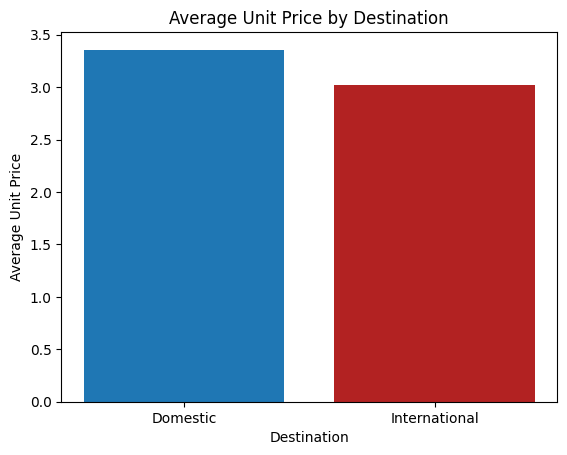

In [179]:
plt.bar(df_average.index, df_average.values,  color=['#1F77B4','#B22222'])
plt.xlabel('Destination')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price by Destination')
plt.show()

In [180]:
print('Heighest Average unit price is sold',df_average.index[0], 'with', df_average.values[0], 'dollars')

Heighest Average unit price is sold Domestic with 3.35716906628768 dollars


#The Most Sold Product Category

In [181]:
#For uncanceled products
df_most_sold_pro = df[df['Canceled'] == 0].groupby('StockCode')['Quantity'].sum().sort_values(ascending= False)
df_most_sold_pro

,Quantity
StockCode,
23843,80995
85099,40490
84077,28590
22197,23363
85123,22621
...,...
85047,1
22146,1
90021,1


In [182]:
most_stockcode = df_most_sold_pro.index[0]
df[df['StockCode']==most_stockcode]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
151230,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011,2.08,16446.0,United Kingdom,0,168469.6,3.0,Domestic


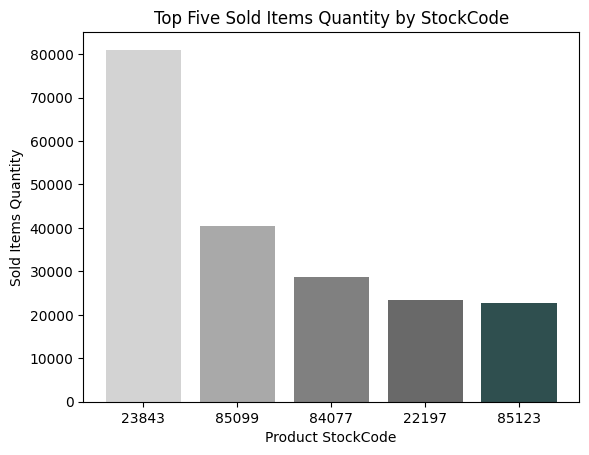

In [183]:
colors = ['#D3D3D3', '#A9A9A9', '#808080', '#696969', '#2F4F4F']
plt.bar(df_most_sold_pro.index[0:5], df_most_sold_pro.values[0:5], color=colors)
plt.xlabel('Product StockCode')
plt.ylabel('Sold Items Quantity')
plt.title('Top Five Sold Items Quantity by StockCode')
plt.show()

#The Most Profitable Product Category

In [184]:
df_most_profit_pro = df[df['Canceled'] == 0].groupby('StockCode')['Revenue'].sum().sort_values(ascending= False)
df_most_profit_pro

,Revenue
StockCode,
23843,168469.60
22423,95314.53
85099,78904.42
47566,66383.14
85123,64815.85
...,...
84990,1.10
84201,0.95
90084,0.85


In [185]:
most_stockcode_prof = df_most_profit_pro.index[0]
df[df['StockCode']==most_stockcode_prof]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,Revenue,Category,Destination
151230,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011,2.08,16446.0,United Kingdom,0,168469.6,3.0,Domestic


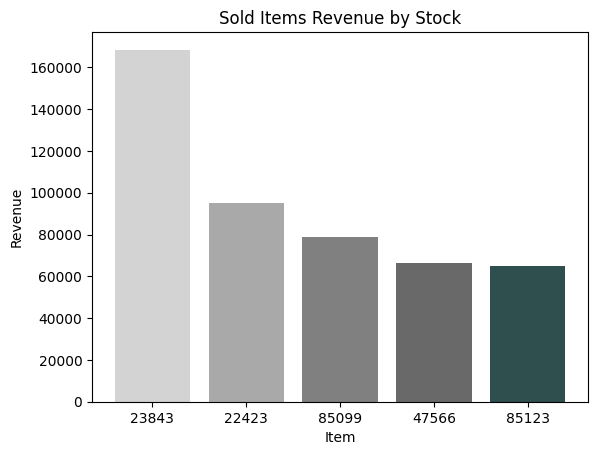

In [186]:
colors = ['#D3D3D3', '#A9A9A9', '#808080', '#696969', '#2F4F4F']
plt.bar(df_most_profit_pro.index[0:5], df_most_profit_pro.values[0:5], color=colors)
plt.xlabel('Item')
plt.ylabel('Revenue')
plt.title('Sold Items Revenue by Stock')
plt.show()

In [187]:
print('Most profitable item has a stockcode of',df_most_profit_pro.index[0], 'with', df_most_profit_pro.values[0], 'dollars sales')

Most profitable item has a stockcode of 23843 with 168469.6 dollars sales


#**And now with the BONUS**

In [188]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
Canceled,int64
Revenue,float64


In [189]:
df_country_percent = df.groupby('Country')['Canceled'].mean().sort_values(ascending=False).reset_index()

# Multiply by 100 to get percentage and round to two decimal places
df_country_percent['Canceled'] = df_country_percent['Canceled'] * 100
df_country_percent['Cancelation_Percentage'] = df_country_percent['Canceled'].apply(lambda x: f"{round(x, 2)}%")

df_country_percent[['Country', 'Cancelation_Percentage']]


,Country,Cancelation_Percentage
0,USA,41.04%
1,Czech Republic,25.0%
2,Japan,9.5%
3,Malta,8.77%
4,Australia,5.79%
5,Germany,5.63%
6,Italy,4.19%
7,EIRE,3.71%
8,European Community,3.12%
9,Sweden,2.61%


#The Most Sold Price Category

In [190]:
#For uncanceled products
df_most_sold_cat = df[df['Canceled'] == 0].groupby('Category')['Quantity'].sum().sort_values(ascending= False)
df_most_sold_cat

,Quantity
Category,
1.0,1136913
2.0,944729
3.0,614958
5.0,148918
4.0,141648


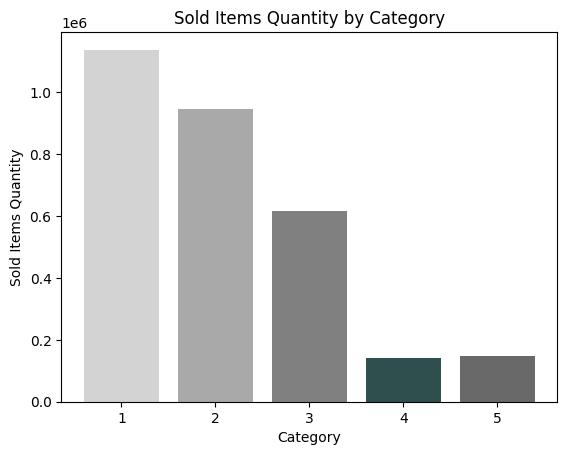

In [191]:
colors = ['#D3D3D3', '#A9A9A9', '#808080', '#696969', '#2F4F4F']
plt.bar(df_most_sold_cat.index, df_most_sold_cat.values, color=colors)
plt.xlabel('Category')
plt.ylabel('Sold Items Quantity')
plt.title('Sold Items Quantity by Category')
plt.show()

In [192]:
print('Most sold category is',df_most_sold_cat.index[0], 'with', df_most_sold_cat.values[0], 'items')

Most sold category is 1.0 with 1136913 items


#The Most Profitable Price Category

In [193]:
df_most_profit_cat = df[df['Canceled'] == 0].groupby('Category')['Revenue'].sum().sort_values(ascending= False)
df_most_profit_cat

,Revenue
Category,
3.0,1652971.84
2.0,1425945.20
5.0,1294179.06
4.0,661367.61
1.0,642062.34


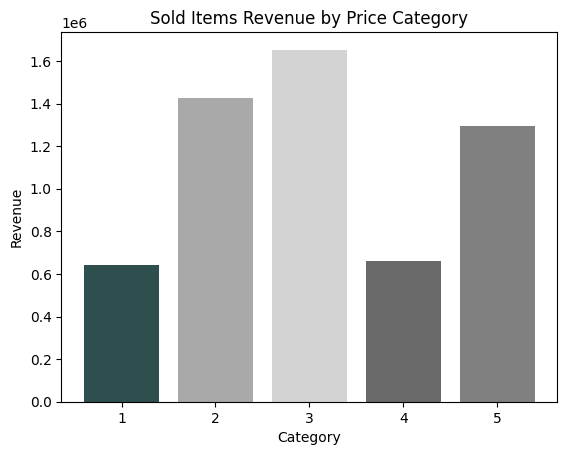

In [194]:
colors = ['#D3D3D3', '#A9A9A9', '#808080', '#696969', '#2F4F4F']
plt.bar(df_most_profit_cat.index, df_most_profit_cat.values, color=colors)
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Sold Items Revenue by Price Category')
plt.show()

In [195]:
print('Most profitable price category is',df_most_profit_cat.index[0], 'with', df_most_profit_cat.values[0], 'dollars')

Most profitable price category is 3.0 with 1652971.84 dollars
